In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
accu_df = pd.read_csv('Datasets/synthetic_accural_data.csv')
accu_df.head()

,transaction_id,customer_unique_id,transaction_date,transaction_type,points,partner_id,store_id,opening_balance,closing_balance,amount,...,trans_currency,conversion_rate,amount_in_trans_currency,usd_conversion_rate,amount_in_usd,channel_code,point_expiry,funding_partner_id,point_type_id,calculated_amount
0,TXN00002862,0006417714fe4a78913920f39a03cdf7,2023-01-06 07:30:00.000000,earn,333.09,439,3896,0.00,333.09,2307.33,...,USD,0.6737,1554.45,0.0805,185.74,CPN,2023-06-05 07:30:00.000000,439,9,2217.93
1,TXN00002863,0006417714fe4a78913920f39a03cdf7,2023-01-08 06:19:00.000000,earn,314.54,439,3025,333.09,647.63,4863.34,...,INR,0.9181,4465.03,0.0969,471.26,CPN,2024-11-02 06:19:00.000000,439,13,4883.89
2,TXN00002864,0006417714fe4a78913920f39a03cdf7,2023-01-09 10:06:00.000000,earn,341.69,212,4950,647.63,989.32,644.58,...,SGD,0.6280,404.80,0.0687,44.28,POS,2023-12-29 10:06:00.000000,212,19,604.63
3,TXN00002866,0006417714fe4a78913920f39a03cdf7,2023-01-11 08:48:00.000000,earn,274.21,439,1144,660.26,934.47,3202.35,...,AED,1.1400,3650.68,0.0767,245.62,POS,2024-10-30 08:48:00.000000,439,15,3627.60
4,TXN00002868,0006417714fe4a78913920f39a03cdf7,2023-01-13 08:15:00.000000,earn,350.79,439,1145,885.07,1235.86,4056.82,...,AED,1.2190,4945.26,0.0618,250.71,CPN,2023-12-27 08:15:00.000000,439,3,4557.73


In [5]:
redm_df = pd.read_csv('Datasets/synthetic_redeem_data.csv')
redm_df.head()

,transaction_id,customer_unique_id,transaction_date,transaction_type,points,partner_id,store_id,opening_balance,closing_balance,amount,...,trans_currency,conversion_rate,amount_in_trans_currency,usd_conversion_rate,amount_in_usd,channel_code,point_expiry,funding_partner_id,point_type_id,calculated_amount
0,TXN00002865,0006417714fe4a78913920f39a03cdf7,2023-01-10 06:39:00.000000,redeem,329.06,439,4201,989.32,660.26,2309.53,...,INR,1.5147,3498.25,0.0457,105.55,CPN,2024-12-22 06:39:00.000000,439,18,2016.54
1,TXN00002867,0006417714fe4a78913920f39a03cdf7,2023-01-12 11:57:00.000000,redeem,49.40,439,3571,934.47,885.07,2484.20,...,INR,0.8328,2068.84,0.0509,126.45,CPN,2024-05-12 11:57:00.000000,439,7,2087.11
2,TXN00005307,002cc23bffa546f1b6135d696f7ee2f8,2023-01-09 19:05:00.000000,redeem,312.96,435,2112,459.79,146.83,1893.40,...,INR,1.1529,2182.90,0.0495,93.72,POS,2024-07-24 19:05:00.000000,435,7,1596.01
3,TXN00005310,002cc23bffa546f1b6135d696f7ee2f8,2023-01-13 21:39:00.000000,redeem,37.73,435,2473,740.86,703.13,4298.60,...,SGD,0.8989,3864.01,0.0794,341.31,POS,2023-10-18 21:39:00.000000,435,1,4166.84
4,TXN00005311,002cc23bffa546f1b6135d696f7ee2f8,2023-01-15 19:38:00.000000,redeem,87.01,435,1948,703.13,616.12,4442.77,...,USD,1.8908,8400.39,0.0416,184.82,CPN,2023-04-11 19:38:00.000000,435,14,3787.68


In [10]:
print("Accural DataFrame columns:",accu_df.columns)
print("Redeem DataFrame columns:",redm_df.columns)

Accural DataFrame columns: Index(['transaction_id', 'customer_unique_id', 'transaction_date',
       'transaction_type', 'points', 'partner_id', 'store_id',
       'opening_balance', 'closing_balance', 'amount', 'is_anomaly',
       'anomaly_types', 'country_code', 'activity_id', 'category_code',
       'sku_category_code', 'item_code', 'quantity', 'created_at',
       'updated_at', 'bill_date', 'business_date', 'rule_id', 'rule_type',
       'payment_type', 'program_id', 'program_country', 'program_currency',
       'base_currency', 'trans_currency', 'conversion_rate',
       'amount_in_trans_currency', 'usd_conversion_rate', 'amount_in_usd',
       'channel_code', 'point_expiry', 'funding_partner_id', 'point_type_id',
       'calculated_amount'],
      dtype='str')
Redeem DataFrame columns: Index(['transaction_id', 'customer_unique_id', 'transaction_date',
       'transaction_type', 'points', 'partner_id', 'store_id',
       'opening_balance', 'closing_balance', 'amount', 'is_anomaly

In [12]:
for acc_col, redm_col in zip(accu_df.columns, redm_df.columns):
    if acc_col != redm_col:
        print(f"Column mismatch: Accural column: {acc_col} | Redeem column: {redm_col}")

In [13]:
print("Accural unique values in anomaly types columns:", accu_df['anomaly_types'].unique())
print("Redeem unique values in anomaly types columns:", redm_df['anomaly_types'].unique())

Accural unique values in anomaly types columns: <StringArray>
[                                  nan, 'accrual_rapid|accrual_multi_partner',
                       'accrual_spike',               'accrual_multi_partner',
           'accrual_partner_deviation',                'accrual_five_per_day',
                       'accrual_rapid']
Length: 7, dtype: str
Redeem unique values in anomaly types columns: <StringArray>
[                           nan,             'redeem_full_wipe',
                 'redeem_rapid',              'redeem_high_pct',
 'redeem_rapid|redeem_high_pct',      'redeem_after_inactivity']
Length: 6, dtype: str


In [14]:
print("Accural DataFrame Shape:", accu_df.shape)
print("Redeem DataFrame Shape:", redm_df.shape)

Accural DataFrame Shape: (8219, 39)
Redeem DataFrame Shape: (2364, 39)


In [15]:
print("Accural DataFrame Data Types:", accu_df.dtypes)
print("Redeem DataFrame Data Types:", redm_df.dtypes)

Accural DataFrame Data Types: transaction_id                  str
customer_unique_id              str
transaction_date                str
transaction_type                str
points                      float64
partner_id                    int64
store_id                      int64
opening_balance             float64
closing_balance             float64
amount                      float64
is_anomaly                    int64
anomaly_types                   str
country_code                  int64
activity_id                   int64
category_code                   str
sku_category_code               str
item_code                       str
quantity                      int64
created_at                      str
updated_at                      str
bill_date                       str
business_date                   str
rule_id                       int64
rule_type                       str
payment_type                    str
program_id                    int64
program_country               int6

In [16]:
# mising % per column
missing_percent_1 = (accu_df.isnull().sum() / len(accu_df)) * 100
print("Missing percentage per column in Accural DataFrame:\n", missing_percent_1)
missing_percent_2 = (redm_df.isnull().sum() / len(redm_df)) * 100
print("Missing percentage per column in Redeem DataFrame:\n", missing_percent_2)

Missing percentage per column in Accural DataFrame:
 transaction_id               0.000000
customer_unique_id           0.000000
transaction_date             0.000000
transaction_type             0.000000
points                       0.000000
partner_id                   0.000000
store_id                     0.000000
opening_balance              0.000000
closing_balance              0.000000
amount                       0.000000
is_anomaly                   0.000000
anomaly_types               80.800584
country_code                 0.000000
activity_id                  0.000000
category_code                0.000000
sku_category_code            0.000000
item_code                    0.000000
quantity                     0.000000
created_at                   0.000000
updated_at                   0.000000
bill_date                    0.000000
business_date                0.000000
rule_id                      0.000000
rule_type                    0.000000
payment_type                 0.0000

In [18]:
# Count of unique values per categorical column
categorical_cols_1 = accu_df.select_dtypes(include=['object', 'category', 'str']).columns
categorical_cols_2 = redm_df.select_dtypes(include=['object', 'category', 'str']).columns
for col in categorical_cols_1:
    unique_values = accu_df[col].unique()
    # print(f"Unique values in Accural DataFrame column '{col}': {unique_values}")
    print(f"Count of unique values in Accural DataFrame column '{col}': {len(unique_values)}")
for col in categorical_cols_2:
    unique_values = redm_df[col].unique()
    # print(f"Unique values in Redeem DataFrame column '{col}': {unique_values}"
    print(f"Count of unique values in Redeem DataFrame column '{col}': {len(unique_values)}")


Count of unique values in Accural DataFrame column 'transaction_id': 8219
Count of unique values in Accural DataFrame column 'customer_unique_id': 1741
Count of unique values in Accural DataFrame column 'transaction_date': 7422
Count of unique values in Accural DataFrame column 'transaction_type': 1
Count of unique values in Accural DataFrame column 'anomaly_types': 7
Count of unique values in Accural DataFrame column 'category_code': 4
Count of unique values in Accural DataFrame column 'sku_category_code': 3
Count of unique values in Accural DataFrame column 'item_code': 5363
Count of unique values in Accural DataFrame column 'created_at': 7442
Count of unique values in Accural DataFrame column 'updated_at': 7467
Count of unique values in Accural DataFrame column 'bill_date': 7382
Count of unique values in Accural DataFrame column 'business_date': 7442
Count of unique values in Accural DataFrame column 'rule_type': 2
Count of unique values in Accural DataFrame column 'payment_type': 4

In [23]:
# Accural DF
#Total rows
print(f"Total rows in accural_df: {len(accu_df)}")

# Count of rows where anomaly_types is not null
count_not_null = accu_df['anomaly_types'].notnull().sum()
print(f"Count of rows where Accural anomaly_types is not null: {count_not_null}")


# Distribution per anomaly type
anomaly_type_distribution = accu_df['anomaly_types'].value_counts()
print("Distribution of anomaly types:")
print(anomaly_type_distribution)

# Redeem DF
#Total rows
print(f"Total rows in redeem_df: {len(redm_df)}")

# Count of rows where anomaly_types is not null
count_not_null_2 = redm_df['anomaly_types'].notnull().sum()
print(f"Count of rows where Redeem anomaly_types is not null: {count_not_null_2}")

# Distribution per anomaly type
anomaly_type_distribution_2 = redm_df['anomaly_types'].value_counts()
print("Distribution of anomaly types:")
print(anomaly_type_distribution_2)


Total rows in accural_df: 8219
Count of rows where Accural anomaly_types is not null: 1578
Distribution of anomaly types:
anomaly_types
accrual_rapid|accrual_multi_partner    480
accrual_five_per_day                   445
accrual_multi_partner                  280
accrual_rapid                          252
accrual_spike                           66
accrual_partner_deviation               55
Name: count, dtype: int64
Total rows in redeem_df: 2364
Count of rows where Redeem anomaly_types is not null: 727
Distribution of anomaly types:
anomaly_types
redeem_rapid|redeem_high_pct    327
redeem_rapid                    198
redeem_high_pct                  83
redeem_after_inactivity          68
redeem_full_wipe                 51
Name: count, dtype: int64


ACCRUAL DATAFRAME - STATISTICS
            amount       points  opening_balance  closing_balance  \
count  8219.000000  8219.000000      8219.000000      8219.000000   
mean   2486.573685   167.517385       419.938345       587.455731   
std    1428.230360   119.882785       512.888295       566.161027   
min      10.070000    22.520000         0.000000        22.570000   
25%    1251.730000    85.865000        39.535000       172.500000   
50%    2487.370000   145.630000       233.840000       386.120000   
75%    3711.800000   238.225000       614.885000       839.510000   
max    4999.910000  1865.490000      3578.830000      3861.580000   

       calculated_amount  conversion_rate  amount_in_usd  
count        8219.000000      8219.000000    8219.000000  
mean         2484.855767         1.258769     138.206361  
std          1464.595504         0.434202     109.436493  
min             8.600000         0.500100       0.190000  
25%          1245.290000         0.885400      47.72

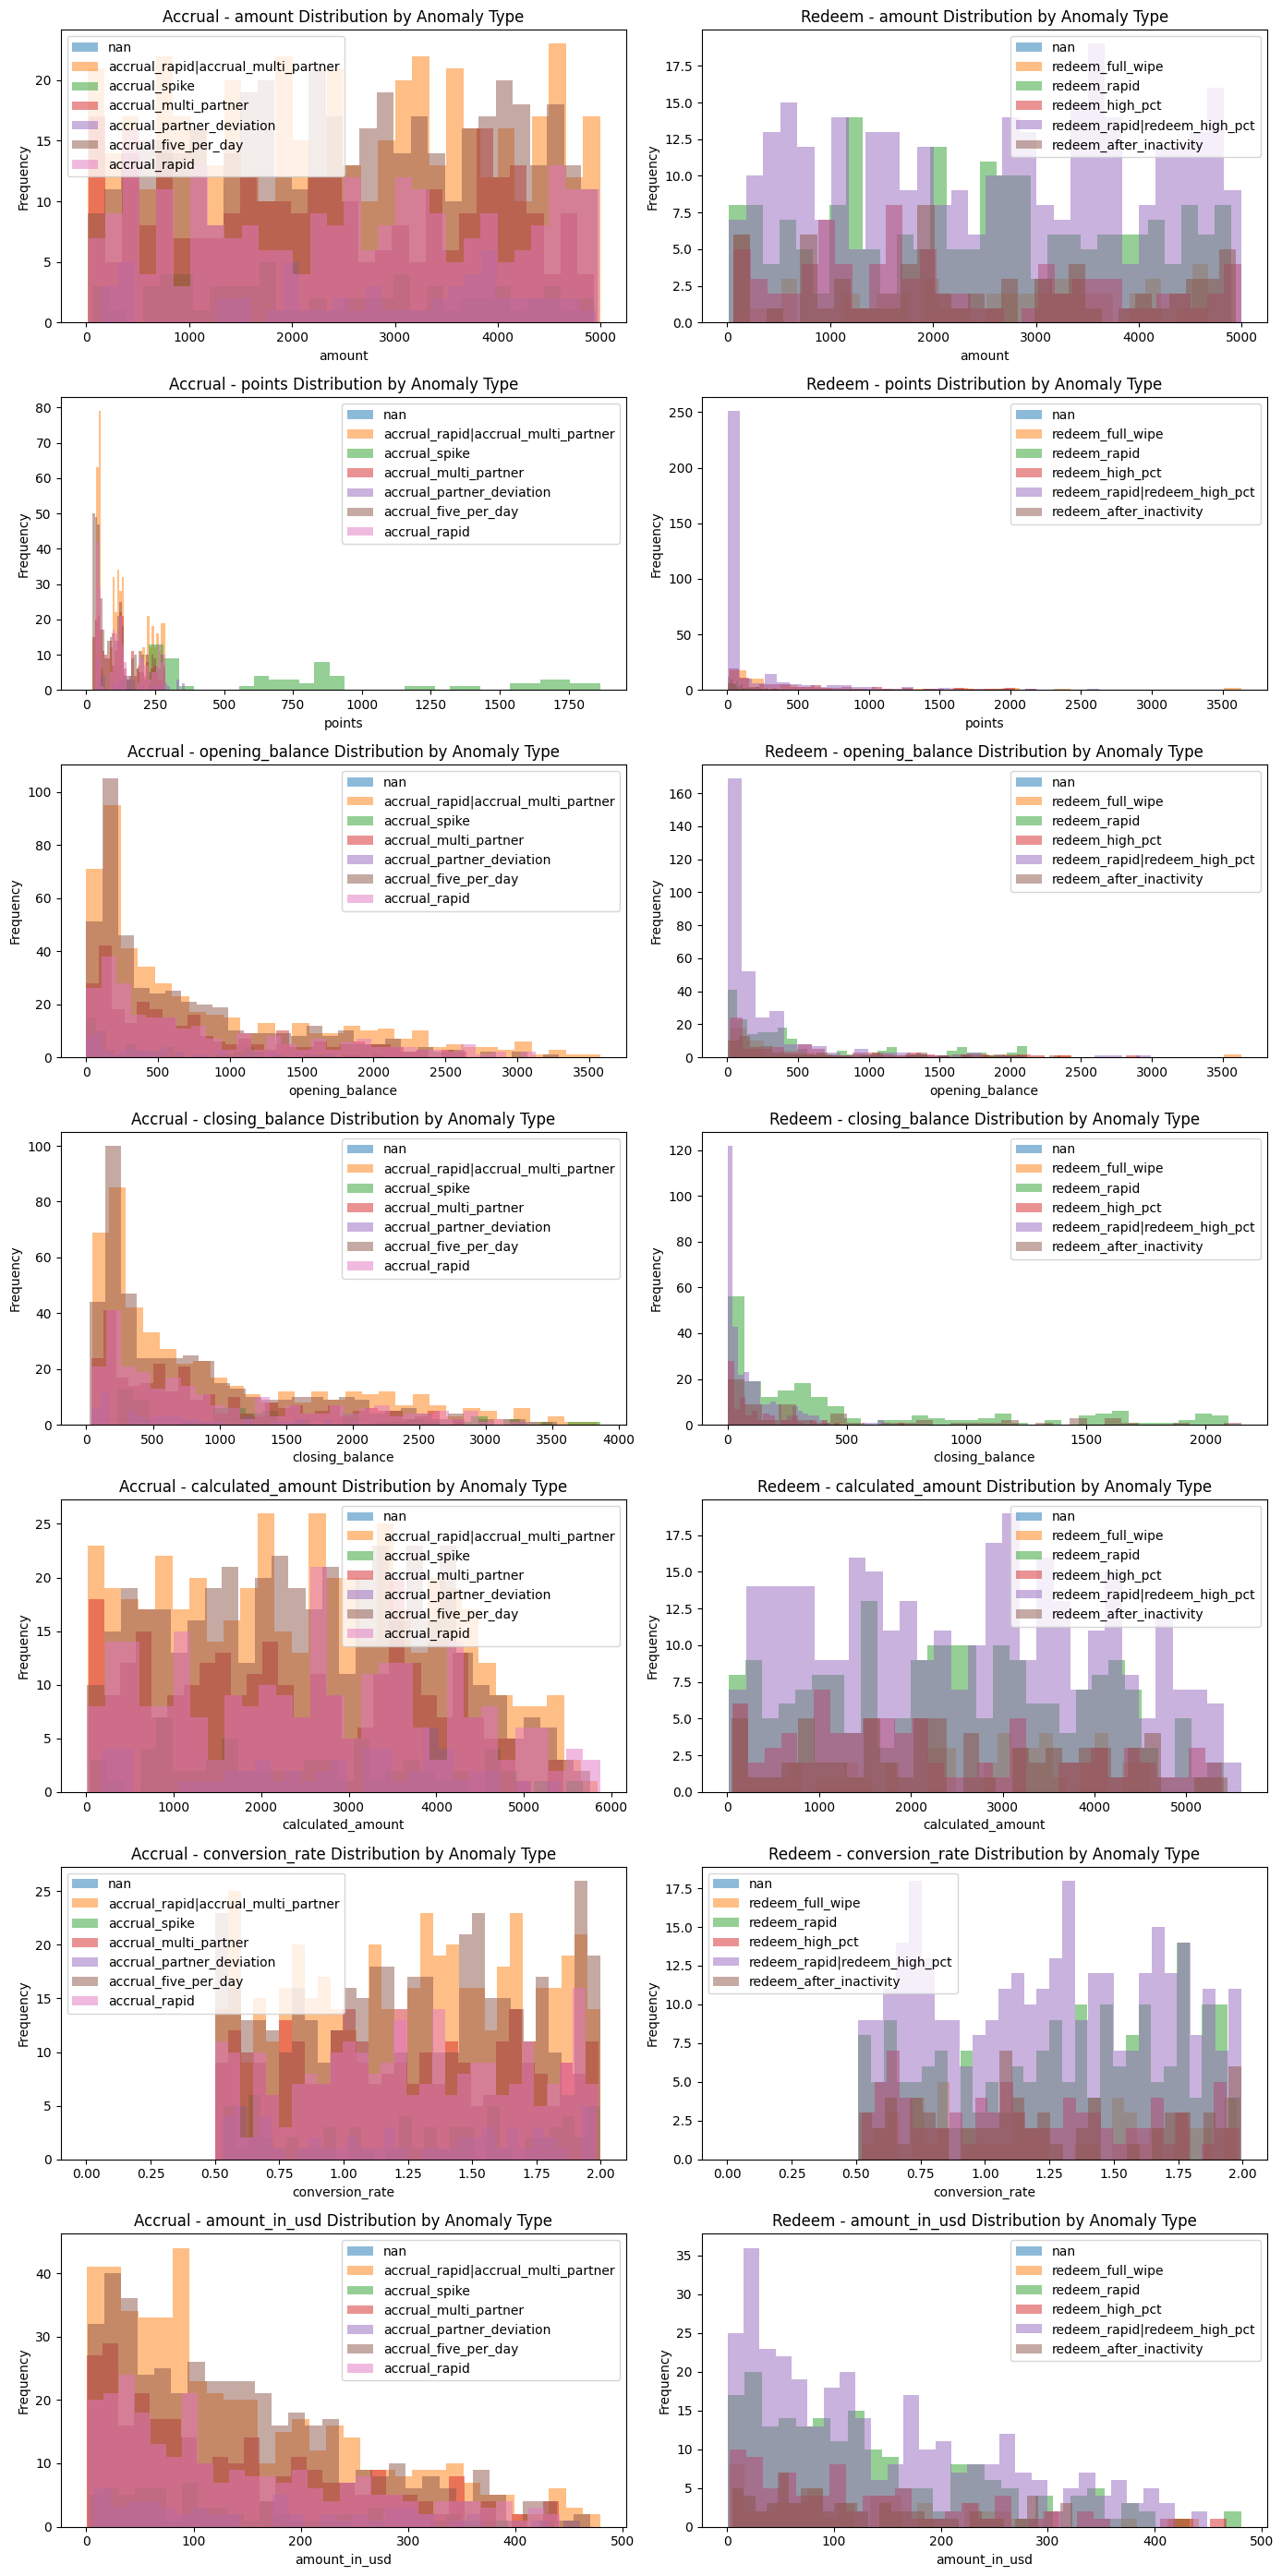

In [24]:
# Numeric columns to analyze
numeric_cols = ['amount', 'points', 'opening_balance', 'closing_balance', 'calculated_amount', 'conversion_rate', 'amount_in_usd']

# Get statistics for Accrual DataFrame
print("=" * 80)
print("ACCRUAL DATAFRAME - STATISTICS")
print("=" * 80)
accu_numeric = accu_df[numeric_cols].describe()
print(accu_numeric)

print("\n" + "=" * 80)
print("REDEEM DATAFRAME - STATISTICS")
print("=" * 80)
redm_numeric = redm_df[numeric_cols].describe()
print(redm_numeric)

# Distributions split by anomaly
print("\n" + "=" * 80)
print("ACCRUAL - STATISTICS BY ANOMALY TYPE")
print("=" * 80)
for col in numeric_cols:
    if col in accu_df.columns:
        print(f"\n{col}:")
        print(accu_df.groupby('anomaly_types')[col].describe())

print("\n" + "=" * 80)
print("REDEEM - STATISTICS BY ANOMALY TYPE")
print("=" * 80)
for col in numeric_cols:
    if col in redm_df.columns:
        print(f"\n{col}:")
        print(redm_df.groupby('anomaly_types')[col].describe())

# Visualizations - Distribution by anomaly type
fig, axes = plt.subplots(len(numeric_cols), 2, figsize=(14, 4*len(numeric_cols)))

for idx, col in enumerate(numeric_cols):
    # Accrual plot
    if col in accu_df.columns:
        for anomaly_type in accu_df['anomaly_types'].unique():
            data = accu_df[accu_df['anomaly_types'] == anomaly_type][col]
            axes[idx, 0].hist(data, alpha=0.5, label=anomaly_type, bins=30)
        axes[idx, 0].set_title(f'Accrual - {col} Distribution by Anomaly Type')
        axes[idx, 0].set_xlabel(col)
        axes[idx, 0].set_ylabel('Frequency')
        axes[idx, 0].legend()
    
    # Redeem plot
    if col in redm_df.columns:
        for anomaly_type in redm_df['anomaly_types'].unique():
            data = redm_df[redm_df['anomaly_types'] == anomaly_type][col]
            axes[idx, 1].hist(data, alpha=0.5, label=anomaly_type, bins=30)
        axes[idx, 1].set_title(f'Redeem - {col} Distribution by Anomaly Type')
        axes[idx, 1].set_xlabel(col)
        axes[idx, 1].set_ylabel('Frequency')
        axes[idx, 1].legend()

plt.tight_layout()
plt.show()

ACCRUAL - TRANSACTION COUNT PER HOUR
hour
0      44
1      31
2      25
3      30
4      21
5      24
6     414
7     452
8     429
9     501
10    435
11    479
12    444
13    431
14    416
15    426
16    413
17    441
18    665
19    646
20    715
21    664
22     32
23     41
Name: count, dtype: int64

ACCRUAL - TRANSACTION COUNT PER DAY
day
2023-01-01      2
2023-01-02     40
2023-01-03     84
2023-01-04    147
2023-01-05    215
             ... 
2024-09-24      5
2024-09-27      1
2024-11-18      1
2024-12-14      1
2025-01-12      1
Name: count, Length: 121, dtype: int64

REDEEM - TRANSACTION COUNT PER HOUR
hour
0       6
1       1
6     104
7     147
8     135
9     137
10    111
11    125
12    128
13    132
14    118
15    118
16    156
17     99
18    205
19    210
20    190
21    234
22      8
Name: count, dtype: int64

REDEEM - TRANSACTION COUNT PER DAY
day
2023-01-02     1
2023-01-03     8
2023-01-04    20
2023-01-05    25
2023-01-06    53
              ..
2023-08-17    

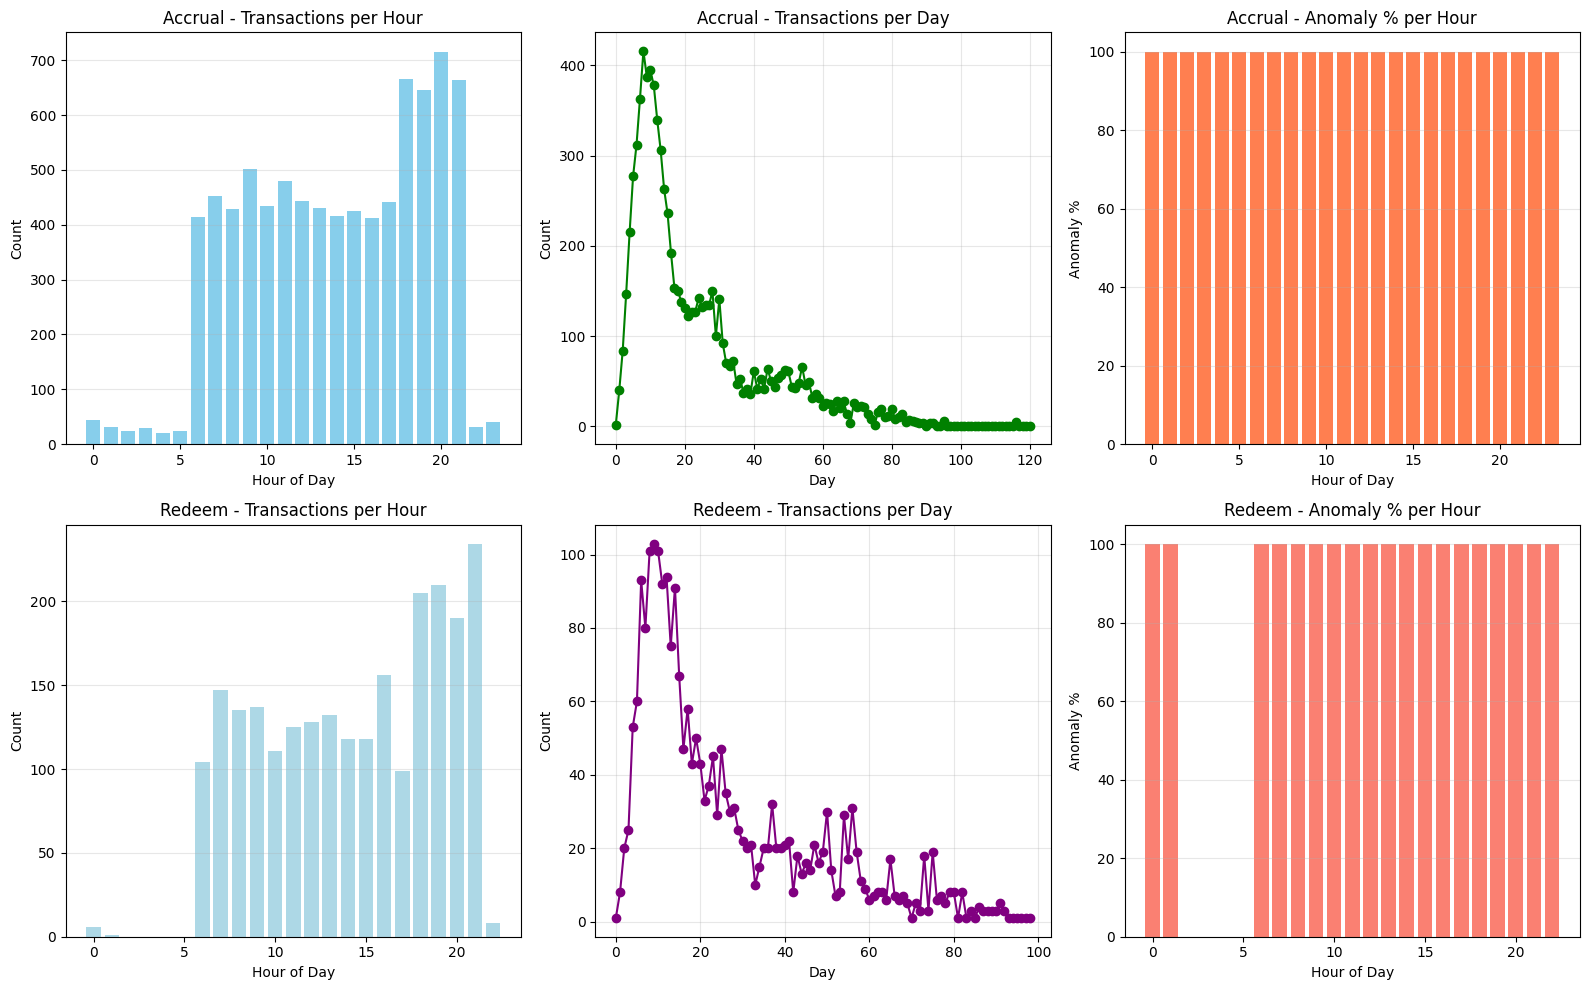

In [25]:
# Convert transaction_date to datetime
accu_df['transaction_date'] = pd.to_datetime(accu_df['transaction_date'])
redm_df['transaction_date'] = pd.to_datetime(redm_df['transaction_date'])

# Extract hour and day
accu_df['hour'] = accu_df['transaction_date'].dt.hour
accu_df['day'] = accu_df['transaction_date'].dt.date
redm_df['hour'] = redm_df['transaction_date'].dt.hour
redm_df['day'] = redm_df['transaction_date'].dt.date

print("=" * 80)
print("ACCRUAL - TRANSACTION COUNT PER HOUR")
print("=" * 80)
accu_per_hour = accu_df['hour'].value_counts().sort_index()
print(accu_per_hour)

print("\n" + "=" * 80)
print("ACCRUAL - TRANSACTION COUNT PER DAY")
print("=" * 80)
accu_per_day = accu_df['day'].value_counts().sort_index()
print(accu_per_day)

print("\n" + "=" * 80)
print("REDEEM - TRANSACTION COUNT PER HOUR")
print("=" * 80)
redm_per_hour = redm_df['hour'].value_counts().sort_index()
print(redm_per_hour)

print("\n" + "=" * 80)
print("REDEEM - TRANSACTION COUNT PER DAY")
print("=" * 80)
redm_per_day = redm_df['day'].value_counts().sort_index()
print(redm_per_day)

# Fraud % per hour
print("\n" + "=" * 80)
print("ACCRUAL - ANOMALY % PER HOUR")
print("=" * 80)
accu_fraud_per_hour = accu_df.groupby('hour')['anomaly_types'].apply(lambda x: (x != 'Normal').sum() / len(x) * 100).round(2)
print(accu_fraud_per_hour)

print("\n" + "=" * 80)
print("REDEEM - ANOMALY % PER HOUR")
print("=" * 80)
redm_fraud_per_hour = redm_df.groupby('hour')['anomaly_types'].apply(lambda x: (x != 'Normal').sum() / len(x) * 100).round(2)
print(redm_fraud_per_hour)

# Visualizations
fig, axes = plt.subplots(2, 3, figsize=(16, 10))

# Accrual - per hour
axes[0, 0].bar(accu_per_hour.index, accu_per_hour.values, color='skyblue')
axes[0, 0].set_title('Accrual - Transactions per Hour')
axes[0, 0].set_xlabel('Hour of Day')
axes[0, 0].set_ylabel('Count')
axes[0, 0].grid(axis='y', alpha=0.3)

# Accrual - per day
axes[0, 1].plot(range(len(accu_per_day)), accu_per_day.values, marker='o', color='green')
axes[0, 1].set_title('Accrual - Transactions per Day')
axes[0, 1].set_xlabel('Day')
axes[0, 1].set_ylabel('Count')
axes[0, 1].grid(alpha=0.3)

# Accrual - fraud % per hour
axes[0, 2].bar(accu_fraud_per_hour.index, accu_fraud_per_hour.values, color='coral')
axes[0, 2].set_title('Accrual - Anomaly % per Hour')
axes[0, 2].set_xlabel('Hour of Day')
axes[0, 2].set_ylabel('Anomaly %')
axes[0, 2].grid(axis='y', alpha=0.3)

# Redeem - per hour
axes[1, 0].bar(redm_per_hour.index, redm_per_hour.values, color='lightblue')
axes[1, 0].set_title('Redeem - Transactions per Hour')
axes[1, 0].set_xlabel('Hour of Day')
axes[1, 0].set_ylabel('Count')
axes[1, 0].grid(axis='y', alpha=0.3)

# Redeem - per day
axes[1, 1].plot(range(len(redm_per_day)), redm_per_day.values, marker='o', color='purple')
axes[1, 1].set_title('Redeem - Transactions per Day')
axes[1, 1].set_xlabel('Day')
axes[1, 1].set_ylabel('Count')
axes[1, 1].grid(alpha=0.3)

# Redeem - fraud % per hour
axes[1, 2].bar(redm_fraud_per_hour.index, redm_fraud_per_hour.values, color='salmon')
axes[1, 2].set_title('Redeem - Anomaly % per Hour')
axes[1, 2].set_xlabel('Hour of Day')
axes[1, 2].set_ylabel('Anomaly %')
axes[1, 2].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

ACCRUAL - PER CUSTOMER METRICS
Customer ID Column: customer_unique_id
                                  txn_count_per_customer  \
customer_unique_id                                         
0006417714fe4a78913920f39a03cdf7                       5   
00176d354809434aaf55a54ce87ed2dc                       2   
001a7b9e46d24548a234519499a5c40e                       2   
002a724f12d7491a94fbb62ae93a377a                       5   
002cc23bffa546f1b6135d696f7ee2f8                       6   
0044296b9afd432f99122451afd516a8                      10   
005e69376c054aa392790b32de618d9a                      10   
0074e25ea6aa411ba26a66dda6ef7c44                       5   
00c7a9df123343d68a095b741233938d                       5   
00e6156c1b9b490497c670ca2a987f37                       2   
00e71252179b496c9b23f7870abfc724                       6   
00ed1e60072943ffb27a5cdbff7697f7                       2   
010c08167ea6451cbaf059153be4a157                       4   
012b0f9ff0dd483cad716b95ca6070

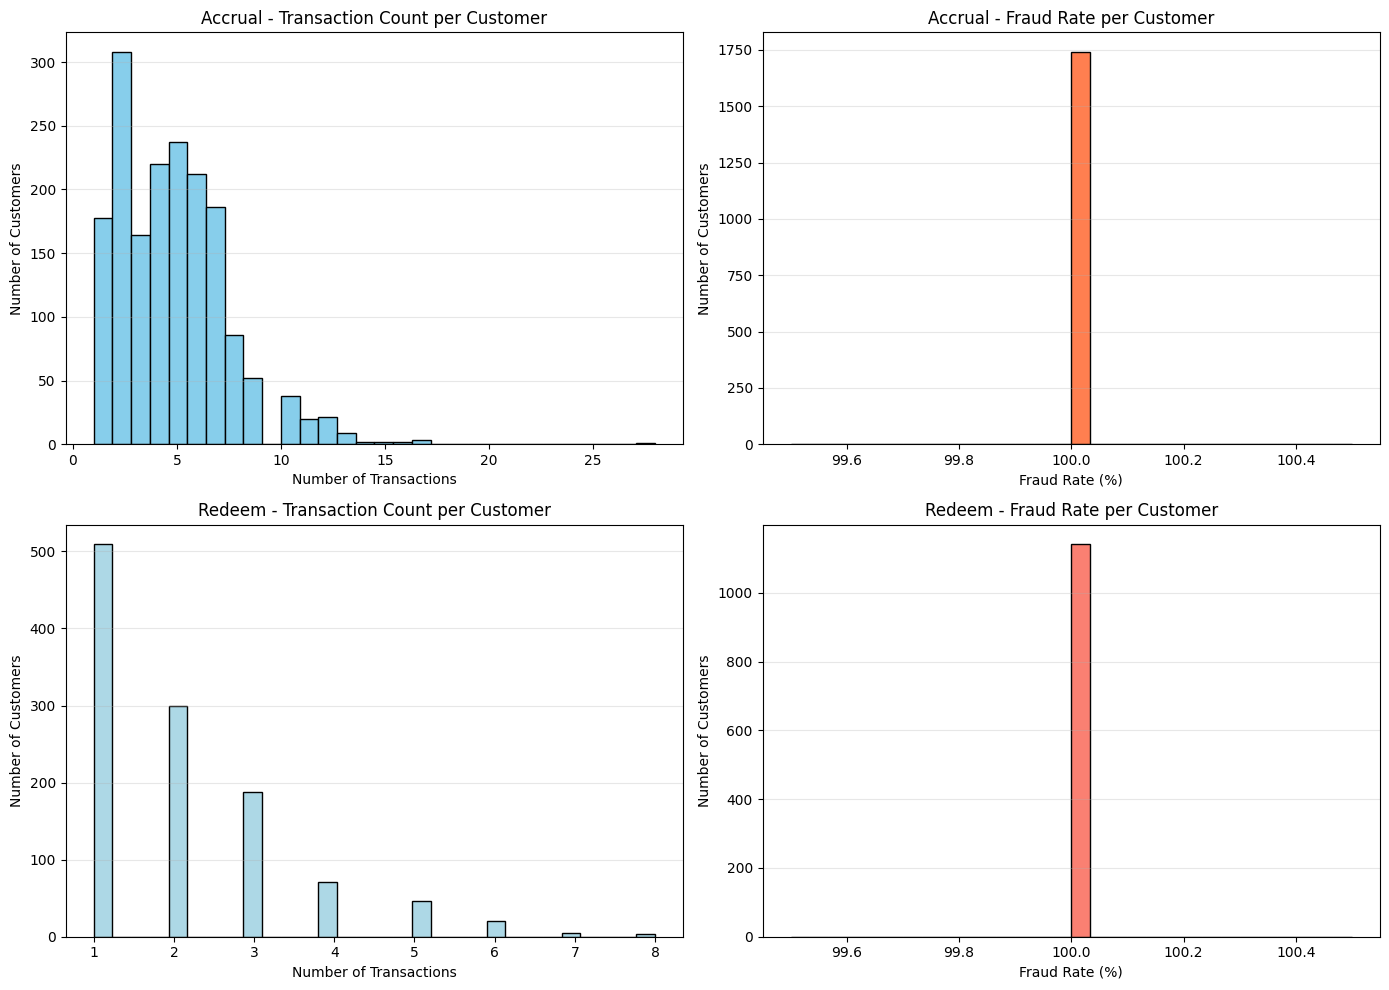


ACCRUAL - CUSTOMERS WITH HIGHEST FRAUD RATES
                                  txn_count_per_customer  \
customer_unique_id                                         
0006417714fe4a78913920f39a03cdf7                       5   
00176d354809434aaf55a54ce87ed2dc                       2   
001a7b9e46d24548a234519499a5c40e                       2   
002a724f12d7491a94fbb62ae93a377a                       5   
002cc23bffa546f1b6135d696f7ee2f8                       6   
0044296b9afd432f99122451afd516a8                      10   
005e69376c054aa392790b32de618d9a                      10   
0074e25ea6aa411ba26a66dda6ef7c44                       5   
00c7a9df123343d68a095b741233938d                       5   
00e6156c1b9b490497c670ca2a987f37                       2   

                                  avg_points_per_customer  \
customer_unique_id                                          
0006417714fe4a78913920f39a03cdf7                   322.86   
00176d354809434aaf55a54ce87ed2dc                  

In [26]:
# Per Customer Analysis
print("=" * 80)
print("ACCRUAL - PER CUSTOMER METRICS")
print("=" * 80)

# Identify customer column (try common names)
accu_customer_col = None
redm_customer_col = None

for col_name in ['customer_id', 'customer_ID', 'customer', 'cust_id', 'customerId']:
    if col_name in accu_df.columns:
        accu_customer_col = col_name
    if col_name in redm_df.columns:
        redm_customer_col = col_name

if accu_customer_col is None:
    # Try to find it automatically
    accu_customer_col = [col for col in accu_df.columns if 'cust' in col.lower() or 'customer' in col.lower()]
    accu_customer_col = accu_customer_col[0] if accu_customer_col else accu_df.columns[0]

if redm_customer_col is None:
    redm_customer_col = [col for col in redm_df.columns if 'cust' in col.lower() or 'customer' in col.lower()]
    redm_customer_col = redm_customer_col[0] if redm_customer_col else redm_df.columns[0]

# Accrual - Per Customer Metrics
accu_customer_metrics = accu_df.groupby(accu_customer_col).agg(
    txn_count_per_customer=('amount', 'count'),
    avg_points_per_customer=('points', 'mean'),
    avg_amount_per_customer=('amount', 'mean')
).round(2)

# Calculate fraud rate for accrual
accu_fraud_rate = accu_df.groupby(accu_customer_col)['anomaly_types'].apply(
    lambda x: (x != 'Normal').sum() / len(x) * 100
).round(2)
accu_customer_metrics['fraud_rate_per_customer'] = accu_fraud_rate

print(f"Customer ID Column: {accu_customer_col}")
print(accu_customer_metrics.head(20))
print(f"\nTotal customers in Accrual: {len(accu_customer_metrics)}")
print(f"\nSummary Statistics:")
print(accu_customer_metrics.describe())

print("\n" + "=" * 80)
print("REDEEM - PER CUSTOMER METRICS")
print("=" * 80)

# Redeem - Per Customer Metrics
redm_customer_metrics = redm_df.groupby(redm_customer_col).agg(
    txn_count_per_customer=('amount', 'count'),
    avg_points_per_customer=('points', 'mean'),
    avg_amount_per_customer=('amount', 'mean')
).round(2)

# Calculate fraud rate for redeem
redm_fraud_rate = redm_df.groupby(redm_customer_col)['anomaly_types'].apply(
    lambda x: (x != 'Normal').sum() / len(x) * 100
).round(2)
redm_customer_metrics['fraud_rate_per_customer'] = redm_fraud_rate

print(f"Customer ID Column: {redm_customer_col}")
print(redm_customer_metrics.head(20))
print(f"\nTotal customers in Redeem: {len(redm_customer_metrics)}")
print(f"\nSummary Statistics:")
print(redm_customer_metrics.describe())

# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Accrual - txn count distribution
axes[0, 0].hist(accu_customer_metrics['txn_count_per_customer'], bins=30, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Accrual - Transaction Count per Customer')
axes[0, 0].set_xlabel('Number of Transactions')
axes[0, 0].set_ylabel('Number of Customers')
axes[0, 0].grid(axis='y', alpha=0.3)

# Accrual - fraud rate distribution
axes[0, 1].hist(accu_customer_metrics['fraud_rate_per_customer'], bins=30, color='coral', edgecolor='black')
axes[0, 1].set_title('Accrual - Fraud Rate per Customer')
axes[0, 1].set_xlabel('Fraud Rate (%)')
axes[0, 1].set_ylabel('Number of Customers')
axes[0, 1].grid(axis='y', alpha=0.3)

# Redeem - txn count distribution
axes[1, 0].hist(redm_customer_metrics['txn_count_per_customer'], bins=30, color='lightblue', edgecolor='black')
axes[1, 0].set_title('Redeem - Transaction Count per Customer')
axes[1, 0].set_xlabel('Number of Transactions')
axes[1, 0].set_ylabel('Number of Customers')
axes[1, 0].grid(axis='y', alpha=0.3)

# Redeem - fraud rate distribution
axes[1, 1].hist(redm_customer_metrics['fraud_rate_per_customer'], bins=30, color='salmon', edgecolor='black')
axes[1, 1].set_title('Redeem - Fraud Rate per Customer')
axes[1, 1].set_xlabel('Fraud Rate (%)')
axes[1, 1].set_ylabel('Number of Customers')
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Additional analysis - Customers with high fraud rates
print("\n" + "=" * 80)
print("ACCRUAL - CUSTOMERS WITH HIGHEST FRAUD RATES")
print("=" * 80)
print(accu_customer_metrics.nlargest(10, 'fraud_rate_per_customer'))

print("\n" + "=" * 80)
print("REDEEM - CUSTOMERS WITH HIGHEST FRAUD RATES")
print("=" * 80)
print(redm_customer_metrics.nlargest(10, 'fraud_rate_per_customer'))